# Jupyter Notebook Version for calculating Equatorial Impact of the Niño

<div class="alert alert-block alert-info">
⚠️ <strong>The data used in this notebook is from <a href="https://www.metoffice.gov.uk/hadobs/hadisst/">HadISST</a> and can be downloaded using this <a href="https://www.metoffice.gov.uk/hadobs/hadisst/data/HadISST_sst.nc.gz">download link</a></strong>
</div>

After download, decompress the file and save it in ./datasets under the name "HadISST_sst.nc"

In [5]:
from spy4cast import Dataset, Region, Month
from spy4cast.spy4cast import Preprocess, MCA, Crossvalidation
import numpy as np

## Configuration

In [40]:
# We will use sea surface temperature both for dataset and predictor, but
# with differnt regions
predictor = Dataset("HadISST_sst.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=10,
           lon0=-60, lonf=15,
           month0=Month.JUN, monthf=Month.AUG,
           year0=1890, yearf=2019),
)
predictand = Dataset("HadISST_sst.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30,
           lon0=-200, lonf=-60,
           month0=Month.DEC, monthf=Month.FEB,  
           # year0, yearf refer to monthf -> will span from DEC 1970 to FEB 2020 
           year0=1891, yearf=2020),
)
#  There is a lag of 6 months (from June to December)

## Methodology

### Preprocessing

In [41]:
# First step. Preprocess variables: anomaly and reshaping
predictor_preprocessed = Preprocess(predictor, period=7, order=4)
predictor_preprocessed.save("y_", "./data-EquatorialAtalantic_Impact_Nino/")
# Save matrices as .npy for fast loading. To load use:
# predictor_preprocessed = Preprocess.load("y_", 
#     "./data-EquatorialAtalantic_Impact_Nino/")
predictand_preprocessed = Preprocess(predictand)
predictand_preprocessed.save("z_", "./data-EquatorialAtalantic_Impact_Nino/")
# predictand_preprocessed = Preprocess.load("z_", 
#     "./data/-EquatorialAtalantic_Impact_Nino")

[INFO] Preprocessing data for variable sst took: 0.271 seconds
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/y_*.npy`
[INFO] Preprocessing data for variable sst took: 1.246 seconds
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/z_*.npy`


### MCA

In [42]:
# Second step. MCA: expansion coefficients and correlation and regression maps
nm = 3
alpha = 0.1
mca = MCA(predictor_preprocessed, predictand_preprocessed, nm, alpha)
mca.save("mca_", "./data-EquatorialAtalantic_Impact_Nino/")
# mca = MCA.load("mca_", "./data-EquatorialAtalantic_Impact_Nino/", 
#     dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Applying MCA 
    Shapes: Z(8400, 130) 
            Y(3000, 130) 
    Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
            Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)
       Took: 8.651 seconds
[INFO] Saving MCA data in `./data-EquatorialAtalantic_Impact_Nino/mca_*.npy`


### Plot MCA

[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/mca.png


((<Figure size 1200x800 with 11 Axes>,),
 (<AxesSubplot:title={'center':'Us Vs mode 1'}>,
  <AxesSubplot:title={'center':'Us Vs mode 2'}>,
  <AxesSubplot:title={'center':'Us Vs mode 3'}>,
  <GeoAxesSubplot:title={'center':'SUY mode 1. SCF=46.2%'}>,
  <GeoAxesSubplot:title={'center':'SUY mode 2. SCF=10.4%'}>,
  <GeoAxesSubplot:title={'center':'SUY mode 3. SCF=7.3%'}>,
  <GeoAxesSubplot:title={'center':'SUZ mode 1. SCF=46.2%'}>,
  <GeoAxesSubplot:title={'center':'SUZ mode 2. SCF=10.4%'}>,
  <GeoAxesSubplot:title={'center':'SUZ mode 3. SCF=7.3%'}>))

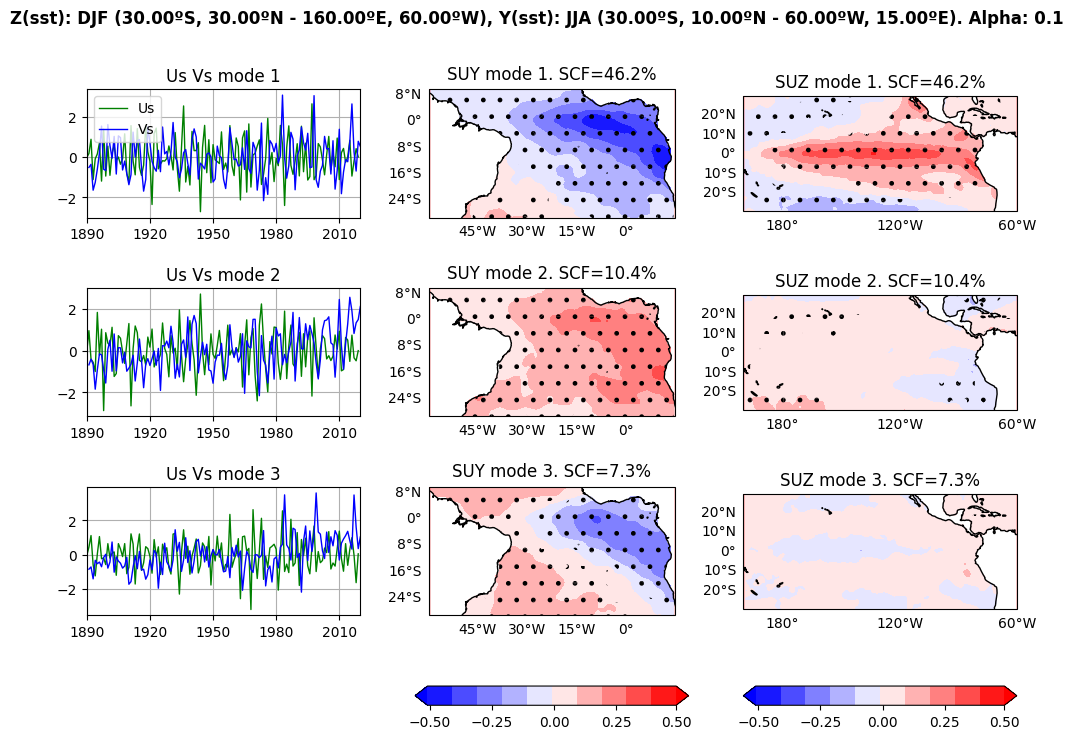

In [43]:
mca.plot(save_fig=True, name="mca.png",
         variable="s",
         folder="./plots-EquatorialAtalantic_Impact_Nino/", 
         y_levels=np.arange(-.51, .51, .1), 
         z_levels=np.arange(-.51, .51, .1),
         width_ratios=[1, 1, 1])

[INFO] Preprocessing data for variable sst took: 0.166 seconds
[INFO] Preprocessing data for variable sst took: 3.930 seconds
[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/mca_global.png


((<Figure size 1300x800 with 11 Axes>,),
 (<AxesSubplot:title={'center':'Us Vs mode 1'}>,
  <AxesSubplot:title={'center':'Us Vs mode 2'}>,
  <AxesSubplot:title={'center':'Us Vs mode 3'}>,
  <GeoAxesSubplot:title={'center':'SUY mode 1. SCF=46.2%'}>,
  <GeoAxesSubplot:title={'center':'SUY mode 2. SCF=10.4%'}>,
  <GeoAxesSubplot:title={'center':'SUY mode 3. SCF=7.3%'}>,
  <GeoAxesSubplot:title={'center':'SUZ mode 1. SCF=46.2%'}>,
  <GeoAxesSubplot:title={'center':'SUZ mode 2. SCF=10.4%'}>,
  <GeoAxesSubplot:title={'center':'SUZ mode 3. SCF=7.3%'}>))

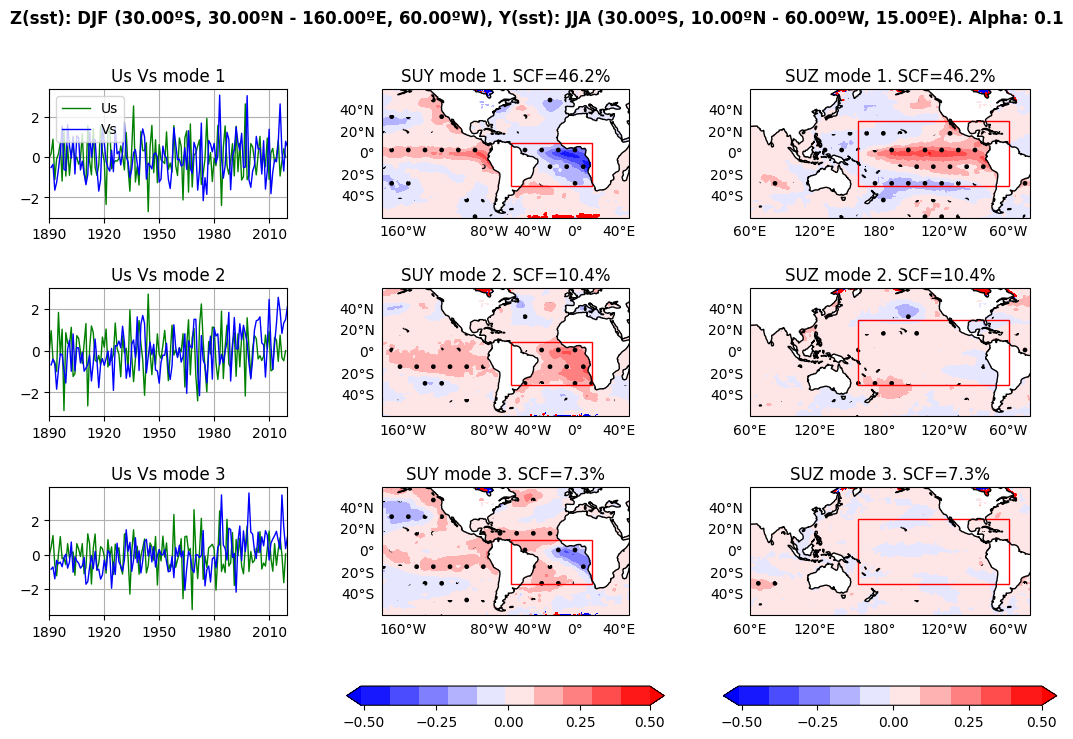

In [47]:
# Plot on a larger map using global regression
map_y = Preprocess(Dataset("HadISST_sst.nc", "./datasets").open("sst").slice(
    Region(lat0=-60, latf=60, lon0=-180, lonf=50, month0=Month.JUN, monthf=Month.AUG,
           year0=1890, yearf=2019)))
map_z = Preprocess(Dataset("HadISST_sst.nc", "./datasets").open("sst").slice(
    Region(lat0=-60, latf=60, lon0=-300, lonf=-40, month0=Month.DEC, monthf=Month.FEB,
           year0=1891
           , yearf=2020)))
mca.plot(save_fig=True, name="mca_global.png", map_y=map_y, map_z=map_z, figsize=(13, 8), 
         variable="s",
         width_ratios=[1.5, 2, 2.1], folder="./plots-EquatorialAtalantic_Impact_Nino/", 
         y_levels=np.arange(-.51, .51, .1), 
         z_levels=np.arange(-.51, .51, .1),)

**Only first mode will be used as it offers 50% of the predictability**

### Crossvalidation

In [45]:
# Third step. Crossvalidation: skill and hidcast evaluation and products
# num_svdvals=1 to speed up calculation (we don't need precise scf)
cross = Crossvalidation(predictor_preprocessed, predictand_preprocessed, nm=1, alpha=alpha, num_svdvals=1)
cross.save("cross_", "./data-EquatorialAtalantic_Impact_Nino/")
# cross = Crossvalidation.load("cross_", "./data-EquatorialAtalantic_Impact_Nino/", 
#     dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Applying Crossvalidation 
    Shapes: Z(8400, 130) 
            Y(3000, 130) 
    Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
            Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)
	year: 1 of 130
	year: 2 of 130
	year: 3 of 130
	year: 4 of 130
	year: 5 of 130
	year: 6 of 130
	year: 7 of 130
	year: 8 of 130
	year: 9 of 130
	year: 10 of 130
	year: 11 of 130
	year: 12 of 130
	year: 13 of 130
	year: 14 of 130
	year: 15 of 130
	year: 16 of 130
	year: 17 of 130
	year: 18 of 130
	year: 19 of 130
	year: 20 of 130
	year: 21 of 130
	year: 22 of 130
	year: 23 of 130
	year: 24 of 130
	year: 25 of 130
	year: 26 of 130
	year: 27 of 130
	year: 28 of 130
	year: 29 of 130
	year: 30 of 130
	year: 31 of 130
	year: 32 of 130
	year: 33 of 130
	year: 34 of 130
	year: 35 of 130
	year: 36 of 130
	year: 37 of 130
	year: 38 of 130
	year: 39 of 130
	year: 40 of 130
	year: 41 of 130
	year: 42 of 130
	year: 43 of 130
	year: 44 of 130
	year: 45 of 130
	year: 46 of 130
	year: 47 of 130
	year: 48 

## Plotting crossvalidation

[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/cross.png


((<Figure size 1600x800 with 6 Axes>,),
 (<GeoAxesSubplot:title={'center':'ACC map'}>,
  <AxesSubplot:title={'center':'ACC time series'}>,
  <GeoAxesSubplot:title={'center':'RMSE map'}>,
  <AxesSubplot:title={'center':'RMSE time series'}>))

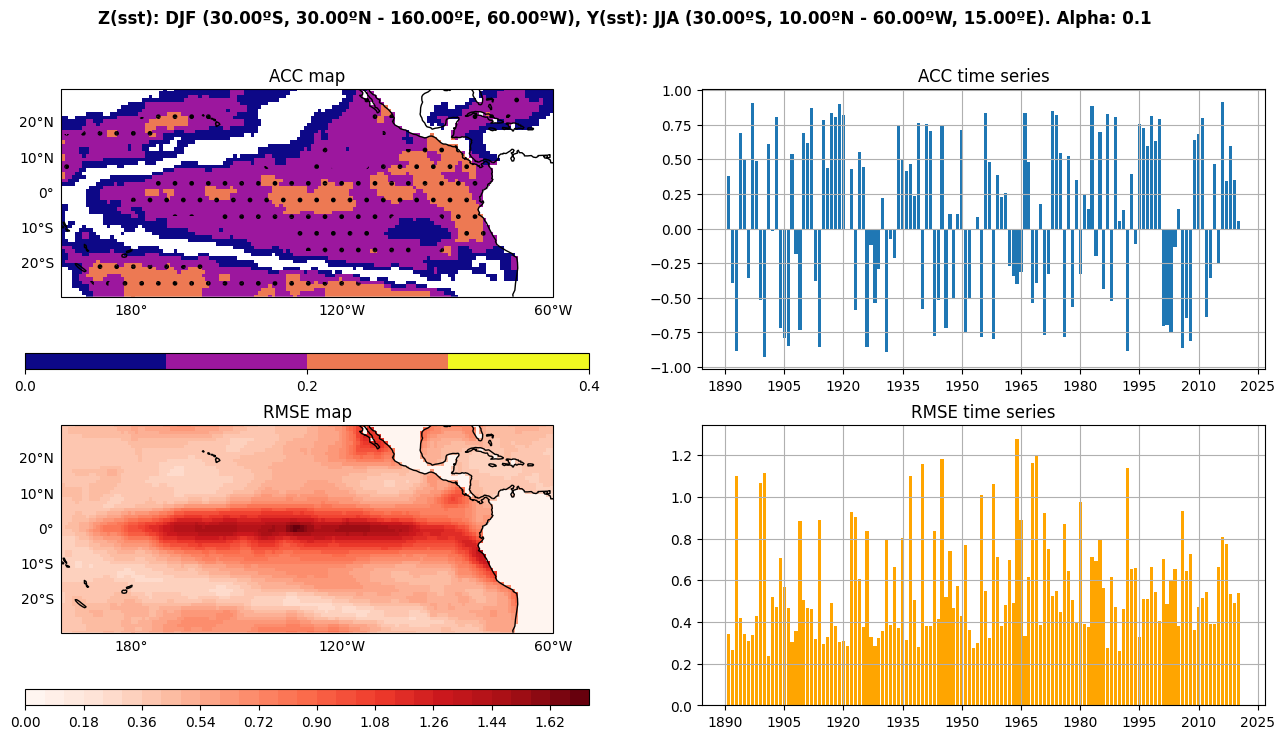

In [46]:
cross.plot(save_fig=True, name="cross.png", plot_type="pcolor",
           nm=1,
           cmap="plasma", map_levels=np.arange(0, 0.41, .1), map_ticks=np.arange(0, 0.41, .2),
           folder="./plots-EquatorialAtalantic_Impact_Nino/")
# cross.plot_zhat(1998, figsize=(12, 10), save_fig=True, name="zhat_1998.png", 
#                 folder="./plots-EquatorialAtalantic_Impact_Nino/", 
#                 z_levels=np.linspace(0, 2, 10), z_ticks=np.linspace(-2, 2, 5))

### Analyse predictability

In [96]:
from scipy import stats

In [97]:
win = 20
nt = mca.Us.shape[1]
r_uv = np.empty(nt - win + 1)
p_uv = np.empty(nt - win + 1)
for i in range(nt - win + 1):
    r_uv[i], p_uv[i] = stats.pearsonr(mca.Us[0, i:i+win], mca.Vs[0, i:i+win])

In [19]:
import matplotlib.pyplot as plt

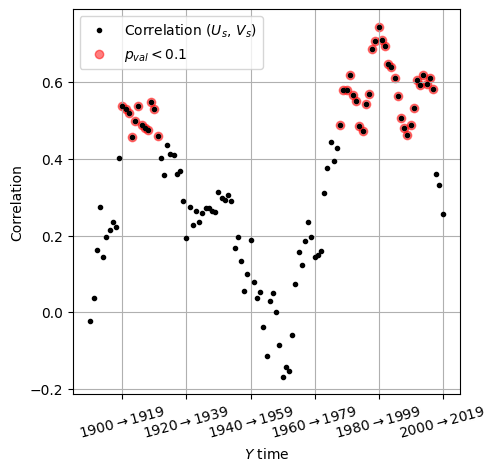

In [99]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ytime = mca.dsy.time
ax.plot(ytime[:nt-win+1], r_uv, ".", color="black", label=r"Correlation $(U_s,\,V_s)$")
ax.scatter(mca.dsy.time[:nt-win+1][p_uv < alpha], r_uv[p_uv < alpha], color="red", alpha=0.5, label="$p_{val} < 0.1$")
ax.grid()
ax.xaxis.set_ticklabels([rf"${int(year)} \rightarrow {int(year+win-1)}$" for year in ax.get_xticks()], rotation=15)
ax.set_xlabel("$Y$ time")
ax.set_ylabel("Correlation")

ax.legend()

## Validation

Let's use the period where the correlation is high and significant (around 1970 to 1995) to train the model and validate in the years after

In [32]:
from spy4cast.spy4cast import Validation

In [33]:
# To apply validation we first preprocess the training data
training_y = Preprocess(Dataset("HadISST_sst.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=10, lon0=-60, lonf=15, month0=Month.JUN, monthf=Month.AUG,
           year0=1970, yearf=1995)), period=7, order=4)
training_z = Preprocess(Dataset("HadISST_sst.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30, lon0=-200, lonf=-60, month0=Month.DEC, monthf=Month.FEB,
           year0=1971, yearf=1996)))

[INFO] Preprocessing data for variable sst took: 0.201 seconds
[INFO] Preprocessing data for variable sst took: 0.258 seconds


[INFO] Applying MCA 
    Shapes: Z(8400, 26) 
            Y(3000, 26) 
    Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
            Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)
       Took: 7.517 seconds


((<Figure size 1700x566.667 with 5 Axes>,),
 (<AxesSubplot:title={'center':'Us Vs mode 1'}>,
  <GeoAxesSubplot:title={'center':'RUY mode 1. SCF=47.6%'}>,
  <GeoAxesSubplot:title={'center':'RUZ mode 1. SCF=47.6%'}>))

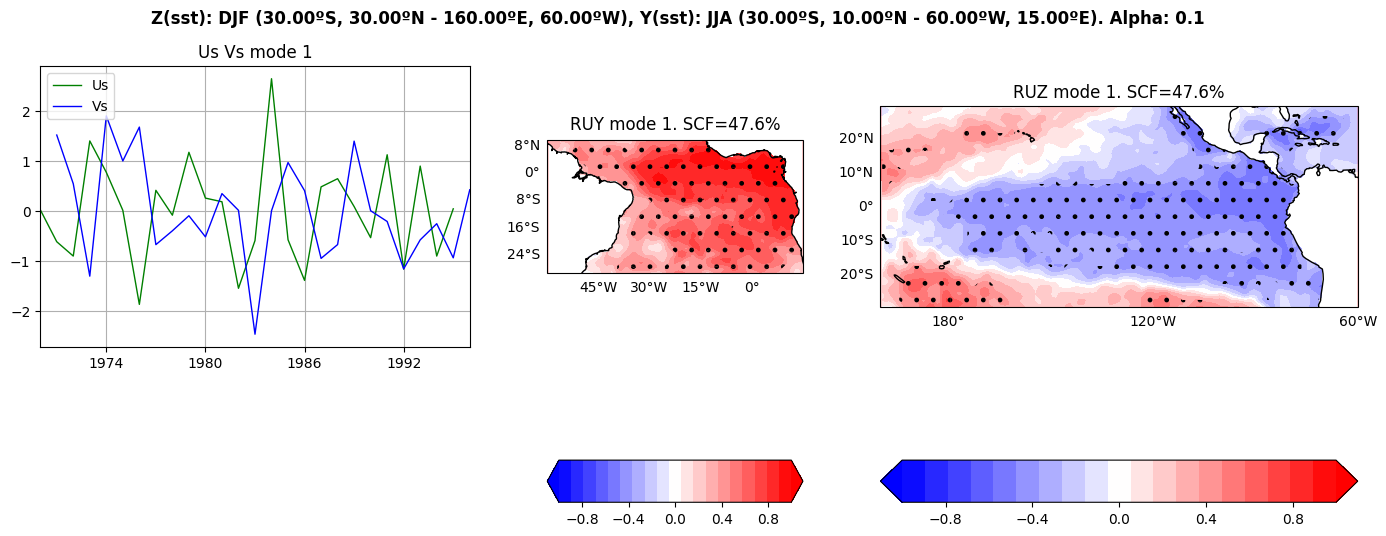

In [34]:
training_mca = MCA(training_y, training_z, nm=1, alpha=alpha)
training_mca.plot()

In [35]:
training_cross = Crossvalidation(training_y, training_z, nm=1, alpha=alpha, num_svdvals=1)
training_cross.save("cross_high_", "./data-EquatorialAtalantic_Impact_Nino/")
# training_cross = Crossvalidation.load("cross_high_", "./data-EquatorialAtalantic_Impact_Nino/", dsy=training_y, dsz=training_z)

[INFO] Applying Crossvalidation 
    Shapes: Z(8400, 26) 
            Y(3000, 26) 
    Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
            Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)
	year: 1 of 26
	year: 2 of 26
	year: 3 of 26
	year: 4 of 26
	year: 5 of 26
	year: 6 of 26
	year: 7 of 26
	year: 8 of 26
	year: 9 of 26
	year: 10 of 26
	year: 11 of 26
	year: 12 of 26
	year: 13 of 26
	year: 14 of 26
	year: 15 of 26
	year: 16 of 26
	year: 17 of 26
	year: 18 of 26
	year: 19 of 26
	year: 20 of 26
	year: 21 of 26
	year: 22 of 26
	year: 23 of 26
	year: 24 of 26
	year: 25 of 26
	year: 26 of 26



	Took: 19.996 seconds
[INFO] Saving Crossvalidation data in `./data-EquatorialAtalantic_Impact_Nino/cross_high_*.npy`


[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/cross_high.png


((<Figure size 1600x800 with 6 Axes>,),
 (<GeoAxesSubplot:title={'center':'ACC map'}>,
  <AxesSubplot:title={'center':'ACC time series'}>,
  <GeoAxesSubplot:title={'center':'RMSE map'}>,
  <AxesSubplot:title={'center':'RMSE time series'}>))

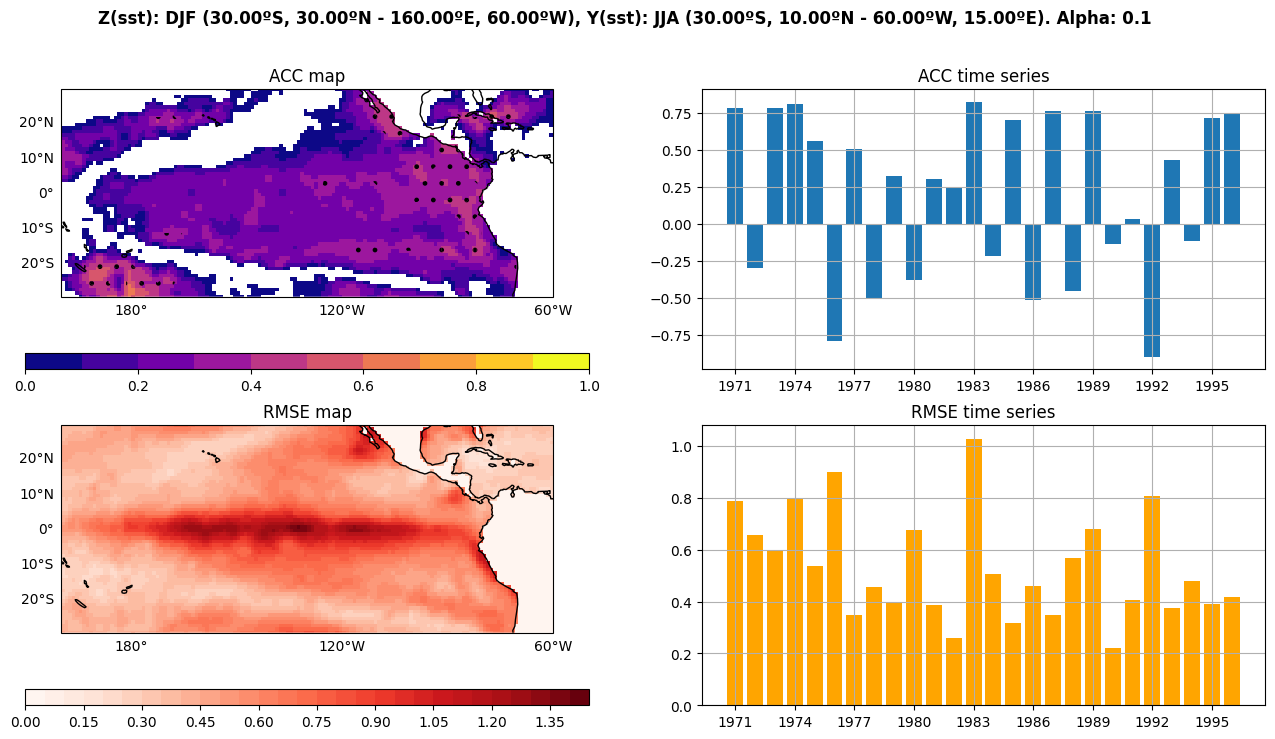

In [36]:
training_cross.plot(save_fig=True, name="cross_high.png", plot_type="pcolor",
           cmap="plasma", map_levels=np.arange(0, 1.1, .1), map_ticks=np.arange(0, 1.1, .2),
           folder="./plots-EquatorialAtalantic_Impact_Nino/")

In [1]:
from spy4cast.meteo import Anom

[INFO] Preprocessing data for variable sst took: 0.013 seconds
[INFO] Preprocessing data for variable sst took: 0.229 seconds
[INFO] Applying Validation
        Training
        ---------- 
        Shapes: Z(8400, 26) 
                Y(3000, 26) 
        Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
                Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)
        
        Validation
        ---------- 
        Shapes: Z(8400, 24) 
                Y(3000, 24) 
        Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
                Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)

	Took: 0.579 seconds
[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/validation19902000.png


(<Figure size 700x800 with 6 Axes>,
 (<GeoAxesSubplot:title={'center':'Y on year 1997'}>,
  <GeoAxesSubplot:title={'center':'Zhat on year 1998'}>,
  <GeoAxesSubplot:title={'center':'Z on year 1998'}>))

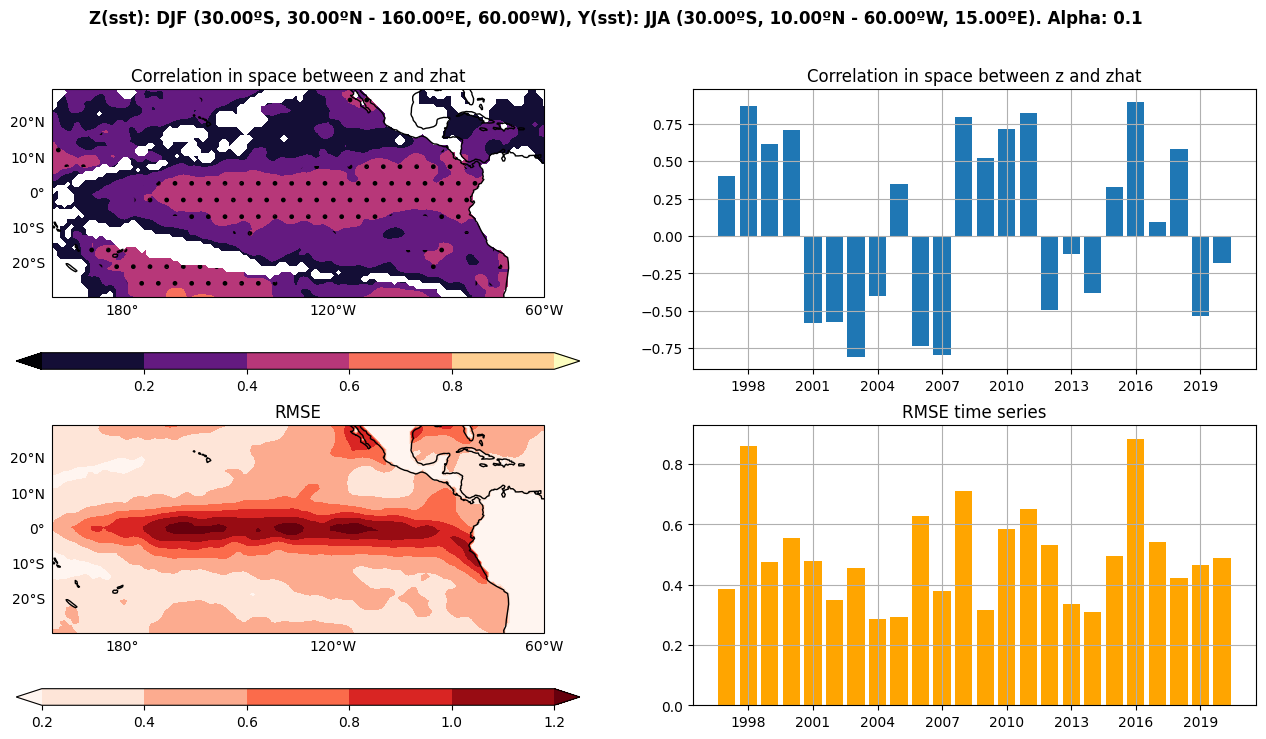

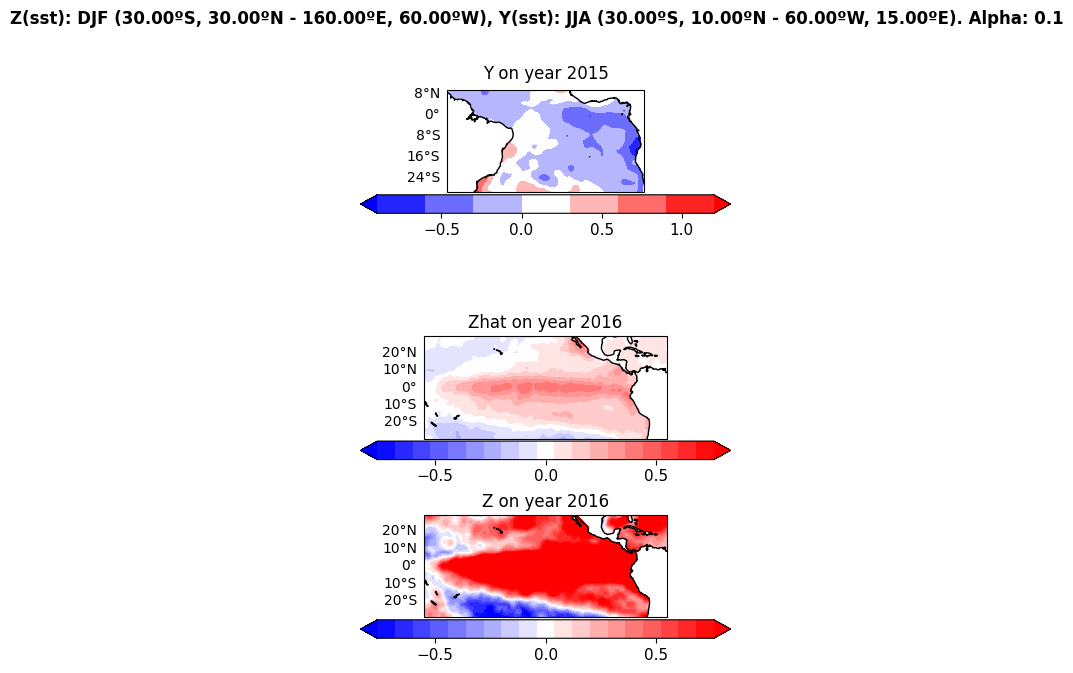

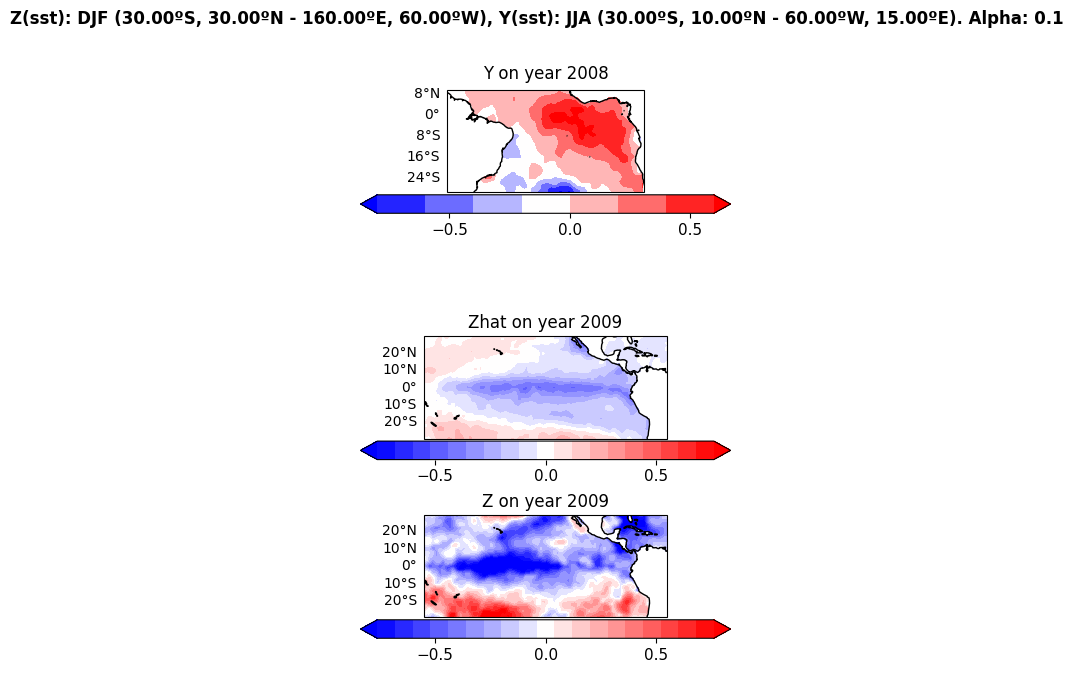

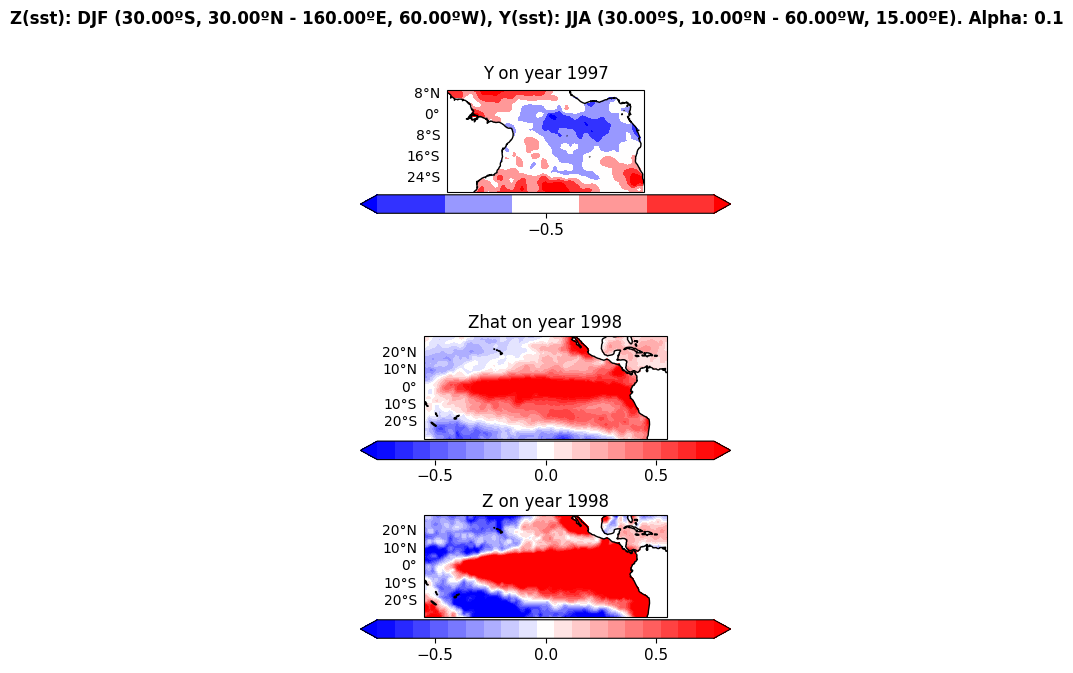

In [39]:
validating_y1 = Preprocess(Dataset("HadISST_sst.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=10, lon0=-60, lonf=15, month0=Month.JUN, monthf=Month.AUG,
           year0=1996, yearf=2019)))
validating_z1 = Preprocess(Dataset("HadISST_sst.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30, lon0=-200, lonf=-60, month0=Month.DEC, monthf=Month.FEB,
           year0=1997, yearf=2020)))
validation1 = Validation(training_mca, validating_y1, validating_z1)

validation1.plot(save_fig=True, folder="./plots-EquatorialAtalantic_Impact_Nino/", 
                 name="validation19902000.png", cmap="magma", version='default',
                 map_levels=np.arange(0, 1.2, .2))
validation1.plot_zhat(2016)
validation1.plot_zhat(2009)
validation1.plot_zhat(1998)

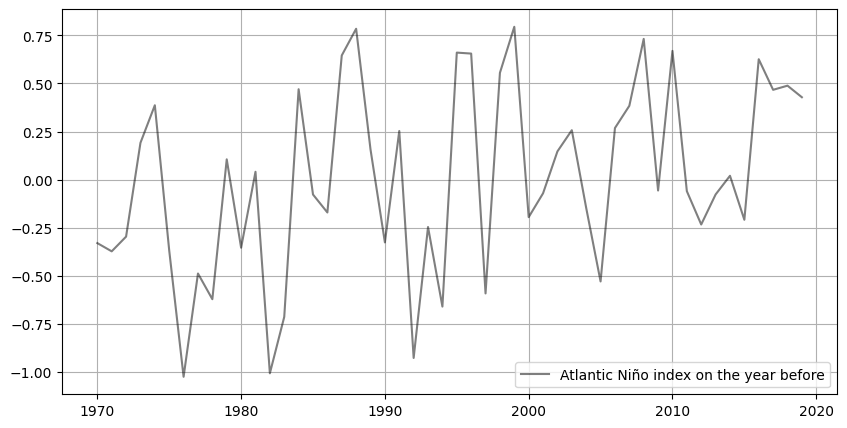

In [66]:
atlantic_nino_anomaly = Anom(
    Dataset("HadISST_sst.nc", "./datasets").open("sst").slice(Region(-3, 3, -20, 0, Month.JUN, Month.AUG, 1970, 2019)), "ts")

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.plot(atlantic_nino_anomaly.time.values, atlantic_nino_anomaly.data.values, label="Atlantic Niño index", color="black", alpha=.5)
ax.legend()
ax.grid()